# Test that sampling noisy SBMFit and graph from noisy SBMFit works

In [1]:
from pathlib import Path
import numpy as np
import scipy.sparse as sp
from sbm.sampling import sample_sbm_graph_from_fit

from sbm.io import SBMFit, SBMWriter
from sbm.noisy_fit import create_sbm_noise

RNG = np.random.default_rng(0)

# Test for empirical fit

In [2]:
sbm = SBMWriter.load(
    Path("/Users/lmmi/anon_sbm/results/sbm_fits/sbm_fit_enron_email_cooling_rate_0_9999_force_undirected_True_init_method_metis_min_block_size_25")
)

Loading SBM fit from /Users/lmmi/anon_sbm/results/sbm_fits/sbm_fit_enron_email_cooling_rate_0_9999_force_undirected_True_init_method_metis_min_block_size_25


In [13]:
EPS, DELTA, ALPHA = 1, 1e-4, 1-1e-4

print(f'Block-conn array before noise:\n{sbm.block_conn.toarray()}')
noise = create_sbm_noise(sbm, EPS, DELTA, ALPHA, noise_type="heterogeneous_gaussian")

lasso_noisy_fit = noise.sample_sbm_fit(RNG, post='lasso')
print(f'Block-conn array after noise+post-processing:\n{lasso_noisy_fit.block_conn.toarray()}')
naive_noisy_fit = noise.sample_sbm_fit(RNG, post='naive')
print(f'Block-conn array after noise+post-processing:\n{naive_noisy_fit.block_conn.toarray()}')

Block-conn array before noise:
[[ 8  4  0 ...  0  0  0]
 [ 4 44  0 ...  0  0  0]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 20 20  0]
 [ 0  0  0 ... 20 53 37]
 [ 0  0  0 ...  0 37 17]]
max σ_n: 0.000, max σ_e: 0.654
[LASSO]    Added 0 edges to previously-zero pairs
Block-conn array after noise+post-processing:
[[ 8  4  0 ...  0  0  0]
 [ 4 44  0 ...  0  0  0]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 20 20  0]
 [ 0  0  0 ... 20 53 37]
 [ 0  0  0 ...  0 37 17]]
[NAIVE]    Added 0 edges to zero pairs.
Block-conn array after noise+post-processing:
[[ 8  4  0 ...  0  0  0]
 [ 4 44  0 ...  0  0  0]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 20 20  0]
 [ 0  0  0 ... 20 52 36]
 [ 0  0  0 ...  0 36 16]]


In [4]:
#graph_data = sample_sbm_graph_from_fit(noisy_fit, rng=RNG)
#print(f'Sampled adjacency:\n{graph_data.adjacency.toarray()}')

In [14]:
value, counts = np.unique(sbm.block_conn.toarray().ravel(), return_counts=True)
lasso_value, lasso_counts = np.unique(lasso_noisy_fit.block_conn.toarray().ravel(), return_counts=True)
naive_value, naive_counts = np.unique(naive_noisy_fit.block_conn.toarray().ravel(), return_counts=True)

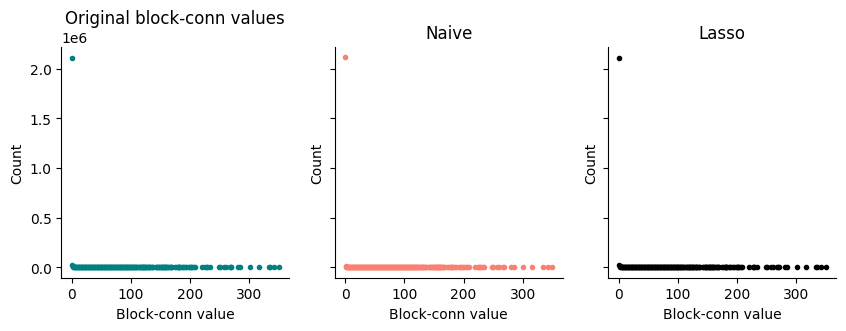

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, sharex=True, figsize=(10,3), sharey=True)
ax[0].plot(value, counts, marker='.', linewidth=0, color='teal')
ax[1].plot(naive_value, naive_counts, marker='.', linewidth=0, color='salmon')
ax[2].plot(lasso_value, lasso_counts, marker='.', linewidth=0, color='black')

ax[0].set_title('Original block-conn values')
ax[1].set_title('Naive')
ax[2].set_title('Lasso')

for axis in ax:
    axis.set_xlabel('Block-conn value')
    axis.set_ylabel('Count')
    #axis.set_yscale('log')
    # remove the right and top spines
    axis.spines[['right', 'top']].set_visible(False)

plt.show(fig)

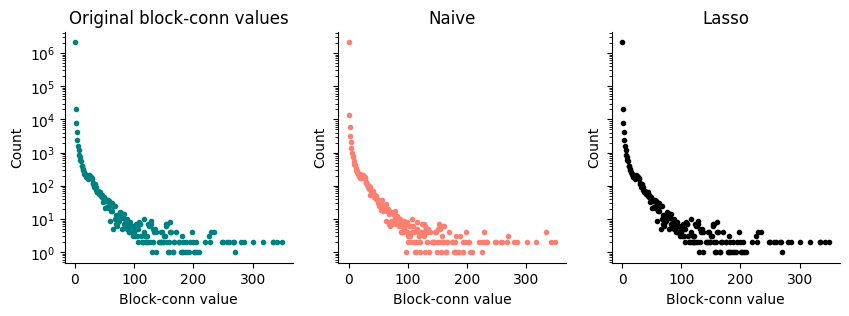

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, sharex=True, figsize=(10,3), sharey=True)
ax[0].plot(value, counts, marker='.', linewidth=0, color='teal')
ax[1].plot(naive_value, naive_counts, marker='.', linewidth=0, color='salmon')
ax[2].plot(lasso_value, lasso_counts, marker='.', linewidth=0, color='black')

ax[0].set_title('Original block-conn values')
ax[1].set_title('Naive')
ax[2].set_title('Lasso')

for axis in ax:
    axis.set_xlabel('Block-conn value')
    axis.set_ylabel('Count')
    axis.set_yscale('log')
    # remove the right and top spines
    axis.spines[['right', 'top']].set_visible(False)

plt.show(fig)

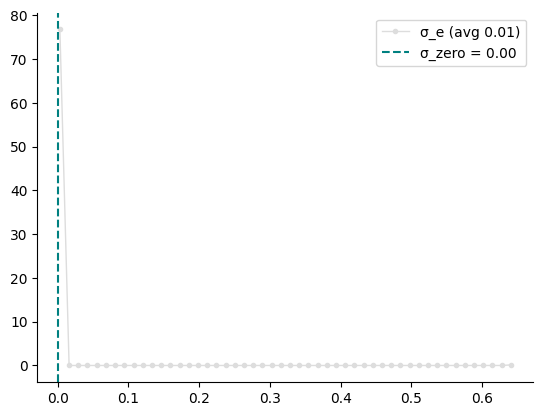

In [17]:
fig, ax = plt.subplots()
hist, bins = np.histogram(noise.sigma_e.data, bins=50, density=True)

ax.plot(bins[:-1], hist, marker='.', linewidth=1, color='#dddddd', label=f'σ_e (avg {np.average(noise.sigma_e.data):.2f})')

sigma_zero = noise.sigma_zero_fun(naive_noisy_fit.block_sizes[0] * naive_noisy_fit.block_sizes[1])

ax.axvline(sigma_zero, color='teal', linestyle='--', label=f'σ_zero = {sigma_zero:.2f}')
plt.legend()
ax.spines[['right', 'top']].set_visible(False)

plt.show(fig)